# Importing Important Libraries 

In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import tensorflow as tf
import seaborn as sns
import pandas as pd

# Defining Functions 

load_dataset is to load Images in form of numpy array

In [2]:
def load_dataset(path):
    from os import listdir
    import cv2
    imagesList = listdir(path)
    loadedImages = []
    for image in imagesList:
        img = np.array(cv2.resize(cv2.imread(path + image),(200,200)))/255.0
        loadedImages.append(img)
    return np.array(loadedImages)


is_this_a_cat_or_a_dog is to Predict if it's a cat or a dog

In [3]:
import cv2
def is_this_a_cat_or_a_dog(path):
    #reading the image from path
    im = cv2.imread(path)
    #reshaping image for inputting in tensor flow
    reshaped_im =  tf.reshape(cv2.resize(im,(200,200)),[1,200,200,3])
    Var = model.predict(reshaped_im)
    print(Var)
    #Checking if it's resemble to cat or not
    if Var >= 0.5:
        print("It's a Cat")
    else:
        print("It's a dog")


Shuffle is to Shuffle Input and Output with same order

In [4]:
def Shuffle(X,Y):
    from sklearn import utils
    x,y = utils.shuffle(X,Y)
    return x,y

Loading Cat Images and Dog Images for Training and Testing

In [5]:
cat_data_train = load_dataset("training_set/cats/")
dog_data_train = load_dataset("training_set/dogs/")
cat_data_test = load_dataset("test_set/cats/")
dog_data_test = load_dataset("test_set/dogs/")

In [6]:
x_test_ = np.append(cat_data_test,dog_data_test,axis = 0)
y_test_ = np.append(np.ones(cat_data_test.shape[0]),np.zeros(dog_data_test.shape[0]))
x_test,y_test = Shuffle(x_test_,y_test_)

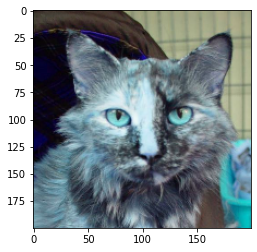

In [7]:
plt.imshow(cat_data_train[1])

Merging Cat and Dog Images Dataset

In [19]:
x_train_dog = dog_data_train[:2000,:,:,:]
x_train_cat = cat_data_train[:2000,:,:,:]
x_train_ = np.append(x_train_cat,x_train_dog,axis = 0)
print(x_train_.shape)

(4000, 200, 200, 3)


Creating output y array of 0's and 1's

In [20]:
y_train_ = np.append(np.ones(2000),np.zeros(2000))
print(y_train_.shape)

(4000,)


Shuffling the data

In [21]:
x_train,y_train = Shuffle(x_train_,y_train_)

In [22]:
#declaring Model 
model = tf.keras.Sequential([
        tf.keras.layers.Conv2D(16,(3,3),input_shape = (200,200,3),activation = "relu"),
        tf.keras.layers.MaxPooling2D(2,2),
        tf.keras.layers.Conv2D(64,(3,3),activation = "relu"),
        tf.keras.layers.MaxPooling2D(2,2),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(128,activation = "relu"),
        tf.keras.layers.Dense(1,activation = "sigmoid")
])

#Checking Model Summary 
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 198, 198, 16)      448       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 99, 99, 16)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 97, 97, 64)        9280      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 48, 48, 64)       0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 147456)            0         
                                                                 
 dense_2 (Dense)             (None, 128)              

In [23]:
model.compile(loss="binary_crossentropy",metrics=['accuracy'],optimizer="adam")

In [24]:
history = model.fit(x_train,y_train,epochs=10)

Epoch 1/10
125/125 [==============================] - 47s 368ms/step - loss: 0.7949 - accuracy: 0.6097
Epoch 2/10
125/125 [==============================] - 44s 356ms/step - loss: 0.5269 - accuracy: 0.7327
Epoch 3/10
125/125 [==============================] - 46s 365ms/step - loss: 0.3734 - accuracy: 0.8413
Epoch 4/10
125/125 [==============================] - 46s 367ms/step - loss: 0.2459 - accuracy: 0.9015
Epoch 5/10
125/125 [==============================] - 47s 373ms/step - loss: 0.1551 - accuracy: 0.9448
Epoch 6/10
125/125 [==============================] - 47s 374ms/step - loss: 0.0787 - accuracy: 0.9772
Epoch 7/10
125/125 [==============================] - 46s 368ms/step - loss: 0.0594 - accuracy: 0.9808
Epoch 8/10
125/125 [==============================] - 46s 365ms/step - loss: 0.0261 - accuracy: 0.9945
Epoch 9/10
125/125 [==============================] - 46s 366ms/step - loss: 0.0096 - accuracy: 0.9992
Epoch 10/10
125/125 [==============================] - 46s 371ms/step - l

c:\Users\vaish\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Epoch VS Loss')

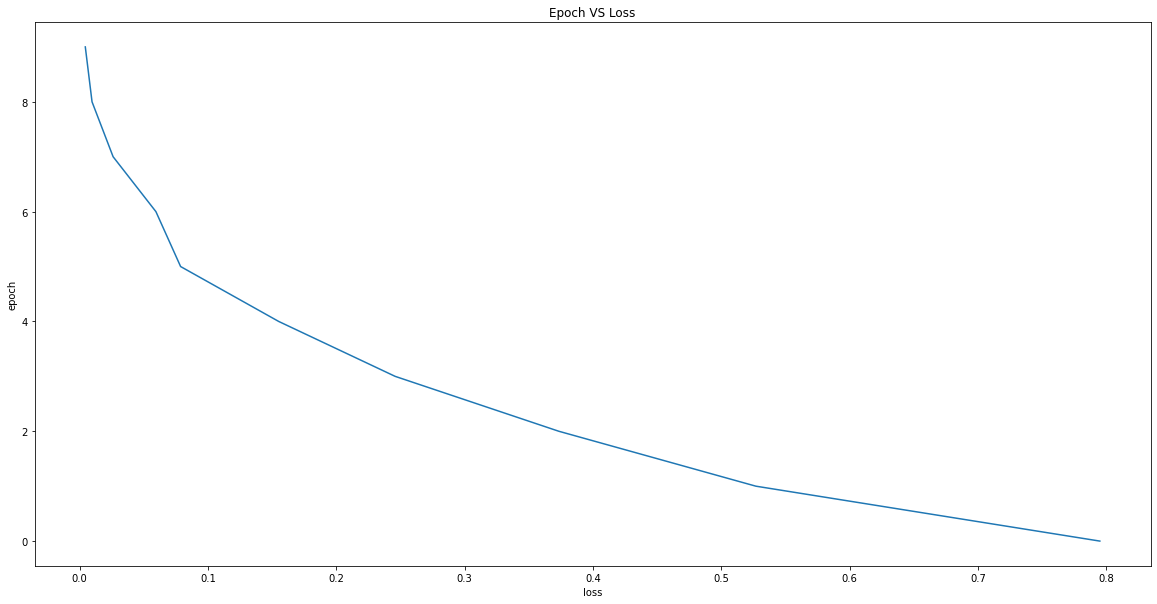

In [25]:
plt.figure(figsize=(20,10))
sns.lineplot(history.history['loss'],history.epoch)
plt.xlabel("loss")
plt.ylabel("epoch")
plt.title("Epoch VS Loss")

1/1 [==============================] - 0s 61ms/step
[[1.]]
It's a Cat


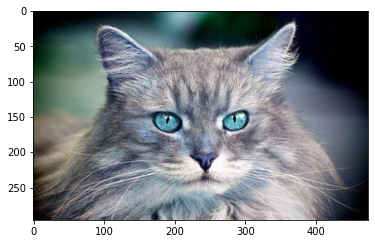

In [26]:
is_this_a_cat_or_a_dog("2.jpg")
plt.imshow(cv2.imread("2.jpg"))

1/1 [==============================] - 0s 23ms/step
[[0.]]
It's a dog


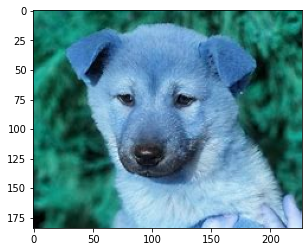

In [27]:
is_this_a_cat_or_a_dog("OIP (1).jpg")
plt.imshow(cv2.imread("OIP (1).jpg"))

In [28]:
model.evaluate(x_test,y_test)

63/63 [==============================] - 7s 103ms/step - loss: 1.4657 - accuracy: 0.7075


[1.4656729698181152, 0.7074999809265137]

1/1 [==============================] - 0s 30ms/step
[[1.]]
It's a Cat


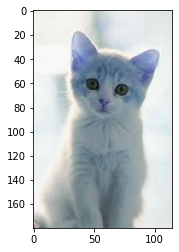

In [29]:
is_this_a_cat_or_a_dog("OIP.jpg")
plt.imshow(cv2.imread("OIP.jpg"))

1/1 [==============================] - 0s 33ms/step
[[0.]]
It's a dog


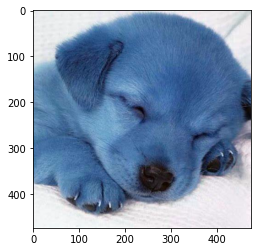

In [31]:
is_this_a_cat_or_a_dog("5.jpg")
plt.imshow(cv2.imread("5.jpg"))